# 3.5 Agent의 히스토리를 관리하는 방법

- 에이전트의 히스토리를 관리해서 대화를 이어나가는 방법을 알아봅니다
- 히스토리를 관리를 위해 `checkpointer`를 사용합니다.
- `checkpointer`는 두 가지 방법을 제공합니다
    - 메모리에 저장하는 방법
    - 데이터베이스에 저장하는 방법
- 이 강의에서는 메모리에 저장하는 방법을 알아봅니다
    - 다양한 [`checkpointer`](https://langchain-ai.github.io/langgraph/concepts/persistence/#checkpointer-libraries)를 확인해보세요

In [6]:
from dotenv import load_dotenv

load_dotenv()

True

In [7]:
# %pip install langchain_openai

# cd /c/Users/sean123/projects/inflearn-langgraph-agent && .venv/Scripts/python.exe -m ensurepip --upgrade
# cd /c/Users/sean123/projects/inflearn-langgraph-agent && .venv/Scripts/python.exe -m pip --version

In [8]:
# from langchain_openai import ChatOpenAI

# query = '인프런에는 어떤 강의가 있나요?'

# llm = ChatOpenAI(model='gpt-4o-mini') # 테스트의 경우에는 작은 모델을 사용합니다
# llm.invoke(query)

In [9]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o')
small_llm = ChatOpenAI(model='gpt-4o-mini')

In [10]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """숫자 a와 b를 더합니다."""
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """숫자 a와 b를 곱합니다."""
    return a * b

In [ ]:
# %pip install -qU duckduckgo-search langchain-community

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\sean123\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
%pip install -U ddgs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\sean123\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun()

In [14]:
# %pip install -qU langchain-google-community


In [16]:
# from langchain_google_community import GmailToolkit

# from langchain_google_community.gmail.utils import (
#     build_resource_service,
#     get_gmail_credentials,
# )

# # Can review scopes here https://developers.google.com/gmail/api/auth/scopes
# # For instance, readonly scope is 'https://www.googleapis.com/auth/gmail.readonly'
# credentials = get_gmail_credentials(
#     token_file="./google/gmail_token.json",
#     scopes=["https://mail.google.com/"],
#     client_secrets_file="./google/gmail_credentials.json",
# )
# api_resource = build_resource_service(credentials=credentials)
# gmail_toolkit = GmailToolkit(api_resource=api_resource)
# gmail_tool_list = gmail_toolkit.get_tools()


In [17]:
gmail_tool_list

NameError: name 'gmail_tool_list' is not defined

In [18]:
# %pip install langchain_core

In [19]:
from langchain.agents import load_tools

loaded_tool_list = load_tools(
    ["arxiv"],
)

ModuleNotFoundError: No module named 'langchain_core.pydantic_v1'

In [ ]:
# %pip install langchain_chroma

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/21.9 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/21.9 MB 12.5 MB/s eta 0:00:02
   --------- ------------------------------ 5.0/21.9 MB 12.1 MB/s eta 0:00:02
   ------------- -------------------------- 7.6/21.9 MB 12.4 MB/s eta 0:00:02
   ------------------ --------------------- 10.2/21.9 MB 12.3 MB/s eta 0:00:01
   ---------------------- ----------------- 12.6/21.9 MB 12.3 MB/s eta 0:00:01
   ---------------------------- ----------- 15.5/21.9 MB 12.2 MB/s eta 0:00:01
   -------------------------------- ------- 18.1/21.9 MB 12.3 MB/s eta 0:00:01
   ------------------------------------- -- 20.7/21.9 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------  21.8/21.9 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 21.9/21.9 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: chromadb
    Found existing installation:


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\sean123\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# %pip install OpenAI


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\sean123\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
# import os

# from langchain_chroma import Chroma
# from langchain_openai import AzureOpenAIEmbeddings
# from langchain_core.tools.retriever import create_retriever_tool

# embedding_function = AzureOpenAIEmbeddings(
#     model='text-embedding-3-large',
#     azure_endpoint=os.getenv('AZURE_OPENAI_EMBEDDING_ENDPOINT'),
#     api_key=os.getenv('AZURE_OPENAI_EMBEDDING_API_KEY')
# )
# vector_store = Chroma(
#     embedding_function=embedding_function,
#     collection_name = 'real_estate_tax',
#     persist_directory='./real_estate_tax_collection'
# )
# retriever = vector_store.as_retriever(search_kwargs={'k': 3})
# retriever_tool = create_retriever_tool(
#     retriever=retriever,
#     name='real_estate_tax_retriever',
#     description='Contains information about real estate tax up to December 2024',
# )

In [22]:
import os

from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_core.tools.retriever import create_retriever_tool

# embedding_function = AzureOpenAIEmbeddings(
#     model='text-embedding-3-large',
#     azure_endpoint=os.getenv('AZURE_OPENAI_EMBEDDING_ENDPOINT'),
#     api_key=os.getenv('AZURE_OPENAI_EMBEDDING_API_KEY')
# )
embedding_function = OpenAIEmbeddings(
    model='text-embedding-3-small'
)

vector_store = Chroma(
    embedding_function=embedding_function,
    collection_name='real_estate_tax',
    persist_directory='./real_estate_tax_collection'
)
retriever = vector_store.as_retriever(search_kwargs={'k': 3})
retriever_tool = create_retriever_tool(
    retriever=retriever,
    name='real_estate_tax_retriever',
    description='Contains information about real estate tax up to December 2024',
)

In [23]:
# %pip install langgraph

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\sean123\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
from langgraph.prebuilt import ToolNode

# tool_list = [add, multiply, search_tool, retriever_tool] + gmail_tool_list + loaded_tool_list
tool_list = [add, multiply, search_tool, retriever_tool]
llm_with_tools = small_llm.bind_tools(tool_list)
tool_node = ToolNode(tool_list)

In [25]:
from langgraph.graph import MessagesState, StateGraph

class AgentState(MessagesState):
    summary: str

graph_builder = StateGraph(AgentState)

In [26]:
from langchain_core.messages import SystemMessage

def agent(state: AgentState) -> AgentState:
    """
    주어진 `state`에서 메시지를 가져와
    LLM과 도구를 사용하여 응답 메시지를 생성합니다.

    Args:
        state (AgentState): 메시지 기록과 요약을 포함하는 state.

    Returns:
        MessagesState: 응답 메시지를 포함하는 새로운 state.
    """
    # 메시지와 요약을 state에서 가져옵니다.
    messages = state['messages']
    summary = state['summary']
    
    # 요약이 비어있지 않으면, 요약을 메시지 앞에 추가합니다.
    if summary != '':
        messages = [SystemMessage(content=f'Here is the summary of the earlier conversation: {summary}')] + messages
    
    # LLM과 도구를 사용하여 메시지에 대한 응답을 생성합니다.
    response = llm_with_tools.invoke(messages)
    
    # 응답 메시지를 포함하는 새로운 state를 반환합니다.
    return {'messages': [response]}

In [27]:
def summarize_messages(state: AgentState) -> AgentState:
    """
    주어진 state의 메시지를 요약합니다.

    Args:
        state (AgentState): 메시지와 요약을 포함하는 state.

    Returns:
        AgentState: 요약된 메시지를 포함하는 딕셔너리.
    """
    # state에서 메시지와 요약을 가져옵니다.
    messages = state['messages']
    summary = state['summary']
    
    # 요약 프롬프트를 생성합니다.
    summary_prompt = f'summarize this chat history below: \n\nchat_history:{messages}'
    
    # 기존 요약이 있으면, 요약을 포함한 프롬프트를 생성합니다.
    if summary != '':
        summary_prompt = f'''summarize this chat history below while looking at the summary of earlier conversations
chat_history:{messages}
summary:{summary}'''
    
    # LLM을 사용하여 요약을 생성합니다.
    summary = small_llm.invoke(summary_prompt)
    
    # 요약된 메시지를 반환합니다.
    return {'summary': summary.content}

In [28]:
from langchain_core.messages import RemoveMessage

def delete_messages(state: AgentState) -> AgentState:
    """
    주어진 state에서 오래된 메시지를 삭제합니다.

    Args:
        state (AgentState): 메시지를 포함하는 state.

    Returns:
        AgentState: 삭제된 메시지를 포함하는 새로운 state.
    """
    # state에서 메시지를 가져옵니다.
    messages = state['messages']
    # 마지막 세 개의 메시지를 제외한 나머지 메시지를 삭제합니다.
    delete_messages = [RemoveMessage(id=message.id) for message in messages[:-3]]
    # 삭제된 메시지를 포함하는 새로운 state를 반환합니다.
    return {'messages': delete_messages}

- 영상에는 수정하면서 누락된 부분입니다 (MessagesState -> AgentState)
- `should_continue`는 `summary`를 바라보지 않기 때문에 에러가 발생하지는 않습니다

In [29]:
from typing import Literal

def should_continue(state: AgentState) -> Literal['tools', 'summarize_messages']:
    """
    주어진 state에 따라 다음 단계로 진행할지를 결정합니다.

    Args:
        state (AgentState): 메시지와 도구 호출 정보를 포함하는 state.

    Returns:
        Literal['tools', 'summarize_messages']: 다음 단계로 'tools' 또는 'summarize_messages'를 반환합니다.
    """
    # state에서 메시지를 가져옵니다.
    messages = state['messages']
    # 마지막 AI 메시지를 확인합니다.
    last_ai_message = messages[-1]
    
    # 마지막 AI 메시지가 도구 호출을 포함하고 있는지 확인합니다.
    if last_ai_message.tool_calls:
        # 도구 호출이 있으면 'tools'를 반환합니다.
        return 'tools'
    
    # 도구 호출이 없으면 'summarize_messages'를 반환합니다.
    return 'summarize_messages'

- `node`를 추가하고 `edge`로 연결합니다

In [30]:
graph_builder.add_node('agent', agent)
graph_builder.add_node('tools', tool_node)
graph_builder.add_node(delete_messages)
graph_builder.add_node(summarize_messages)

In [31]:
from langgraph.graph import START, END


graph_builder.add_edge(START, 'agent')
graph_builder.add_conditional_edges(
    'agent',
    should_continue,
    ['tools', 'summarize_messages']
)
graph_builder.add_edge('tools', 'agent')
graph_builder.add_edge('summarize_messages', 'delete_messages')
graph_builder.add_edge('delete_messages', END)

- 히스토리 관리를 위해 `checkpointer`를 사용합니다
    - `MemorySaver`는 메모리에 저장하는 방법입니다


In [32]:
from langgraph.checkpoint.memory import MemorySaver

checkpointer = MemorySaver()

graph= graph_builder.compile(checkpointer=checkpointer)

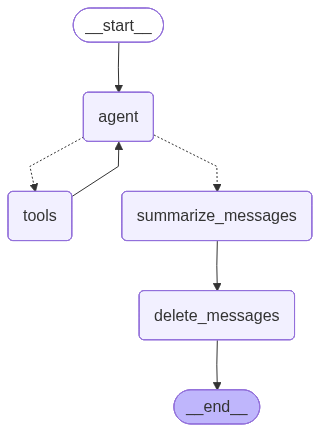

In [33]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

- `checkpointer`를 사용하는 경우, 관리를 위해 `thread_id`를 사용합니다

In [42]:
from langchain_core.messages import HumanMessage

config = {
    'configurable': {
        'thread_id': 'summarize_paper'
    }
}

query = 'woosean999@gmail.com으로 Attention Is All You Need 논문을 요약해서 이메일 초안을 작성해주세요'
for chunk in graph.stream({'messages': [HumanMessage(query)], 'summary': ''}, config=config, stream_mode='values'):
    chunk['messages'][-1].pretty_print()

================================ Human Message =================================

woosean999@gmail.com으로 Attention Is All You Need 논문을 요약해서 이메일 초안을 작성해주세요
================================== Ai Message ==================================

아래는 "Attention Is All You Need" 논문에 대한 요약을 포함한 이메일 초안입니다. 수신인은 woosean999@gmail.com입니다.

---

받는 사람: woosean999@gmail.com  
제목: 논문 요약 - Attention Is All You Need

안녕하세요,

최근 자연어 처리(NLP) 분야에서 중요한 논문인 "Attention Is All You Need"에 대해 간단히 요약하여 공유하고자 합니다.

이 논문은 2017년 Google Brain 연구진에 의해 발표되었으며, 자연어 처리의 패러다임을 혁신적으로 변화시킨 Transformer 모델을 소개합니다. 기존의 RNN 기반 Encoder-Decoder 아키텍처는 순차적 특성으로 인해 훈련 시 병렬화가 어렵고, 긴 데이터에 대한 처리 성능이 저하되는 문제를 가지고 있었습니다.

논문의 핵심 기여는 RNN Cell 대신 Attention 메커니즘을 이용하여 Encoder와 Decoder를 설계했다는 점입니다. 이 구조는 두 개의 번역 작업을 통해 병렬 처리가 가능하며, 훈련 시간을 크게 단축시킬 수 있음을 입증했습니다. 

결과적으로 "Attention Is All You Need"는 기존 모델들보다 뛰어난 성능을 보여주며, 발표 당시 가장 높은 성과를 기록했습니다.

더 자세한 내용은 아래 링크에서 확인하실 수 있습니다: [Attention Is All You Need](https://arxiv.org/abs/1706.03762)

궁금한 점이 있

In [35]:
current_message_list = graph.get_state(config).values['messages']
current_message_list

[AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 190, 'total_tokens': 215, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_3683ee3deb', 'id': 'chatcmpl-CttAVMX0psIqqQW03MMPDvfPpXouw', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b8367-4719-7db2-9155-50db7133d304-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Attention Is All You Need 논문 요약'}, 'id': 'call_VHGX2BfebYGsJHsMdC2ZV7S8', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 190, 'output_tokens': 25, 'total_tokens': 215, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio'

In [36]:
graph.get_state(config).values['summary']


'In the chat history, a user requested a summary of the "Attention Is All You Need" paper to be drafted into an email. The AI performed a search and provided a detailed summary for the email draft, highlighting that the paper, introduced by the Google Brain team in 2017, presented the Transformer model which revolutionized natural language processing (NLP) by addressing the limitations of RNN-based Encoder-Decoder architectures. The summary emphasized the model\'s ability to perform parallel processing and significantly reduce training times, showcasing its superior performance in translation tasks. The email draft was structured with a greeting, summary of the paper\'s contributions, and an offer for further information. The user was invited to suggest any necessary modifications or additions to the draft.'

In [37]:
# from langchain_core.messages import RemoveMessage

# for index, message in enumerate(current_message_list):
#     if index < len(current_message_list) - 1:
#         graph.update_state(config, {'messages': RemoveMessage(id=message.id)})

In [38]:
# current_message_list = graph.get_state(config).values['messages']
# current_message_list

In [43]:
from langchain_core.messages import HumanMessage

config = {
    'configurable': {
        'thread_id': 'summarize_paper'
    }
}

update_query = '논문의 출처 URL을 포함시켜주세요'
for chunk in graph.stream({'messages': [HumanMessage(update_query)]}, config=config, stream_mode='values'):
    chunk['messages'][-1].pretty_print()

================================ Human Message =================================

논문의 출처 URL을 포함시켜주세요
================================== Ai Message ==================================

아래는 "Attention Is All You Need" 논문에 대한 요약을 포함하고, 출처 URL을 추가한 이메일 초안입니다. 수신인은 woosean999@gmail.com입니다.

---

받는 사람: woosean999@gmail.com  
제목: 논문 요약 - Attention Is All You Need

안녕하세요,

최근 자연어 처리(NLP) 분야에서 중요한 논문인 "Attention Is All You Need"에 대해 간단히 요약하여 공유하고자 합니다.

이 논문은 2017년 Google Brain 연구진에 의해 발표되었으며, 자연어 처리의 패러다임을 혁신적으로 변화시킨 Transformer 모델을 소개합니다. 기존의 RNN 기반 Encoder-Decoder 아키텍처는 순차적 특성으로 인해 훈련 시 병렬화가 어렵고, 긴 데이터에 대한 처리 성능이 저하되는 문제를 가지고 있었습니다.

논문의 핵심 기여는 RNN Cell 대신 Attention 메커니즘을 이용하여 Encoder와 Decoder를 설계했다는 점입니다. 이 구조는 두 개의 번역 작업을 통해 병렬 처리가 가능하며, 훈련 시간을 크게 단축시킬 수 있음을 입증했습니다. 

결과적으로 "Attention Is All You Need"는 기존 모델들보다 뛰어난 성능을 보여주며, 발표 당시 가장 높은 성과를 기록했습니다.

자세한 내용은 아래 링크에서 확인하실 수 있습니다: [Attention Is All You Need](https://arxiv.org/abs/1706.03762)

논문의 출처 URL: [https://arxiv.org/abs/1706.03762](ht

In [44]:
graph.get_state(config).values['summary']


'The chat history details the process of drafting an email summarizing the paper "Attention Is All You Need." The initial draft highlighted the introduction of the Transformer model, emphasizing its advantages over traditional RNN-based architectures, including enhanced parallel processing and reduced training times. \n\nFollowing a request, the AI incorporated a URL to the paper. Another user then specified a different recipient\'s email (woosean999@gmail.com), prompting the AI to generate a revised draft that retained the original content while including the URL. Each draft also offered an invitation for further edits or additions if necessary.'

In [41]:
# send_query = '이메일을 전송해주세요'
# for chunk in graph.stream({'messages': [HumanMessage(send_query)]}, config=config, stream_mode='values'):
#     chunk['messages'][-1].pretty_print()